In [12]:
using Plots, Images
using Rotations, ImageTransformations, CoordinateTransformations, Interpolations
using nTomo, LaTeXStrings

In [3]:
function mat2gray_inv(img)
    m, M = extrema(img)
    return Gray.((M .- img)./(M-m))
end

function _rotimg(img::Matrix{T}, θ, c=Union{Real, Nothing}=nothing) where T<:AbstractFloat
    m, n = size(img)
    if c === nothing
        img_center = (m>>1, n>>1)
    else 
        img_center = (c[1], c[2])
    end
    θ = θ/180.0*π
    mv, Mv = extrema(img)
    timg = Gray.((img.-mv)/(Mv-mv))
    trfm = recenter(RotMatrix(θ), img_center)
    img1 = warp(timg, inv(trfm), method=BSpline(Linear()), fillvalue = Flat(), axes(timg))
    result = T.((img1[1:m, 1:n]).*(Mv-mv) .+ mv)
    return result
end

_rotimg (generic function with 2 methods)

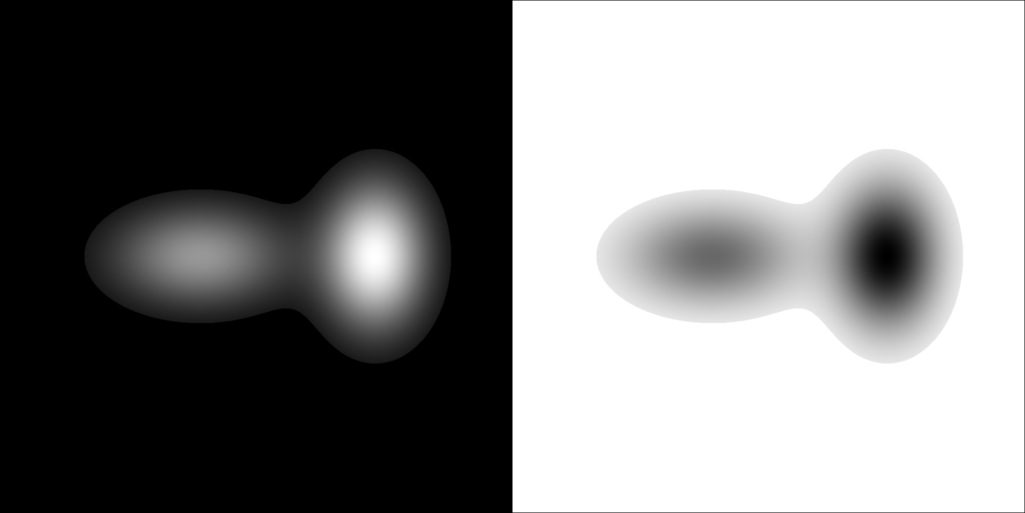

In [4]:
img = zeros((1024, 1024))

for I in CartesianIndices(img)
    y, x = Tuple(I)
    img[y, x] = 6.0*exp(-(x-400)^2/30000 - (y-512)^2/10000) 
    img[y, x] += 10.0*exp(-(x-750)^2/10000 - (y-512)^2/20000) 
end

img[img.<1.0] .= 0.0

q = mat2gray(img)
q_inv = mat2gray_inv(img)
# save("object.png", q)
# save("object_inv.png", q_inv)
[q q_inv]

In [25]:
plot(sum(img, dims=1)[1,:], label = :none, xticks=[], yticks=[], background_color=:transparent, lc=:red,
thickness_scaling=5, size=(600, 200))
savefig("../images/radon1.png")# 

"/Users/jiyong/development/Projects/nTomoExamples/images/radon1.png"

In [10]:
img2 = _rotimg(img, -45, (512, 512))
p2= mat2gray(img2)
# save("../images/rotated_object.png", p2)

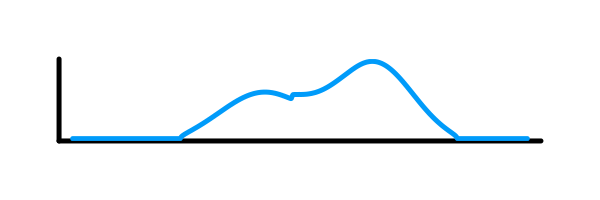

In [29]:
plot(sum(img2, dims=1)[1,:], label = :none, xticks=[], yticks=[], background_color=:transparent,
thickness_scaling=5,size=(600, 200) )
# savefig("../images/radon2.png")

In [8]:
extrema(img)

(0.0, 10.102490714944084)

In [9]:
ths = 0:0.3:179.9
sinogram = radon(img, ths)

600×1024 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱                 ⋮              
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

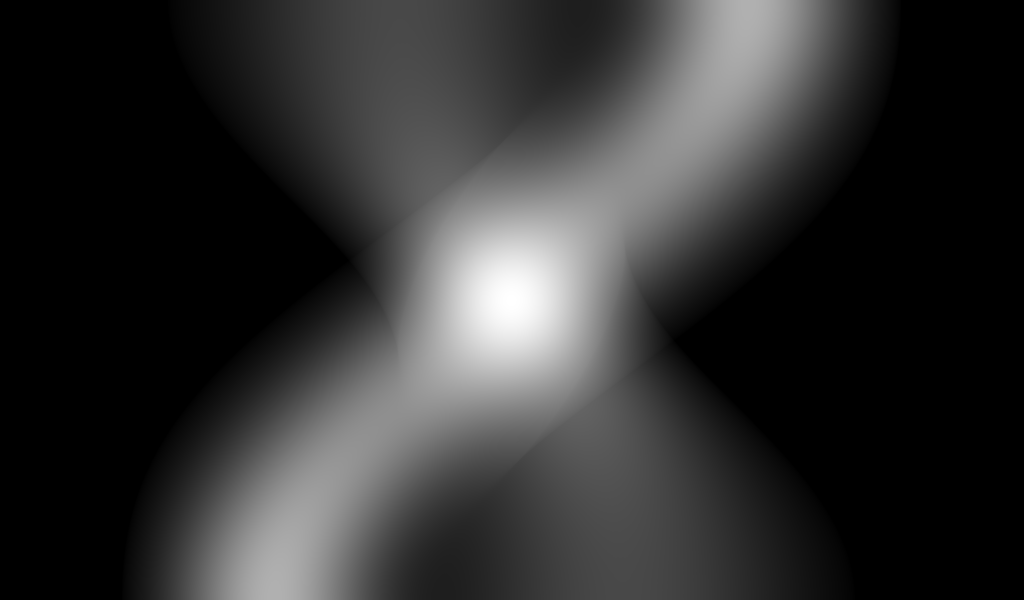

In [13]:
mat2gray(sinogram)

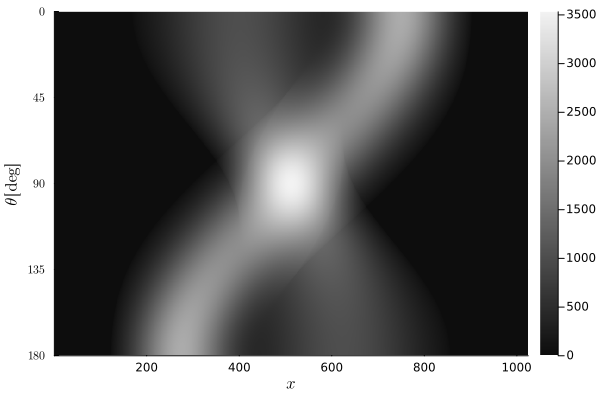

In [18]:
heatmap(sinogram, yflip=:true, xlabel = L"$x$", ylabel =L"\theta [\textrm{deg}]", c=:grays, yticks = ([0, 150, 300, 450, 600], [L"0", L"45", L"90", L"135", L"180"]))
# savefig("../images/object_sinogram.png")

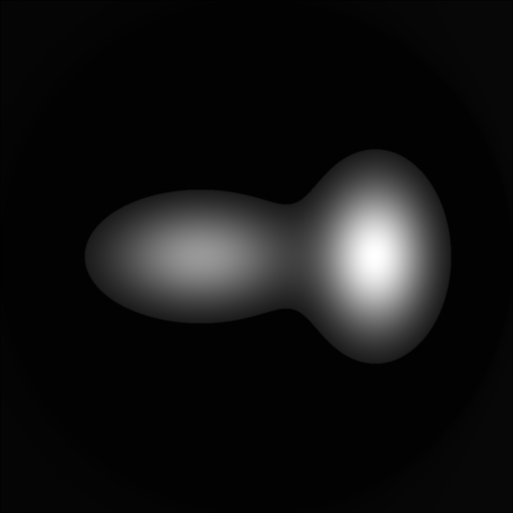

In [23]:
recimg = iradon_fbp(Float32.(sinogram), ths, 512)
mat2gray(recimg)

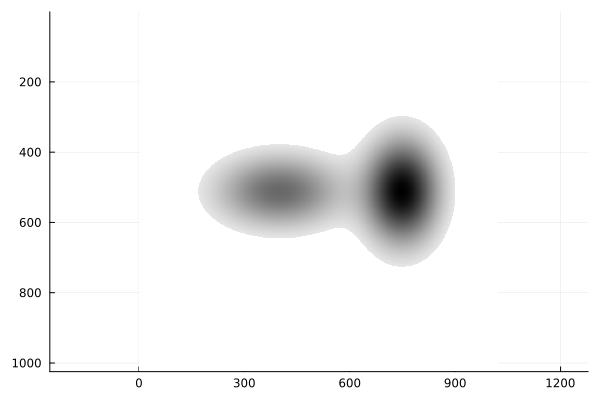

In [31]:
heatmap(q_inv, background_color=:transparent,)

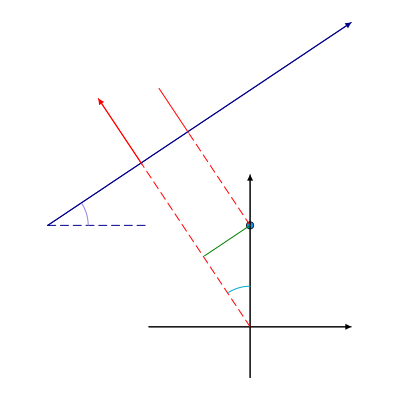

In [27]:
function get_arc(x0, y0, radius, θ1, θ2, N = 20)
    θ = range(θ1*π/180.0, θ2*π/180.0, N)
    xx = x0 .+ (radius .* cos.(θ))
    yy = y0 .+ (radius .* sin.(θ))
    return [(xx[i], yy[i]) for i in eachindex(xx)]
end


p1=scatter([0,],[1,], frame = :none, xticks=[], yticks=[], aspect_ratio = :equal, legend = :none, size = (400, 400))
plot!([-1, 1], [0, 0], color = :black, arrow=(:closed, 2.0))
plot!([0, 0], [-0.5, 1.5], color = :black, arrow=(:closed, 2.0))

plot!([-2, 1], [1, 3], color = :darkblue, arrow=(:closed, 2.0))
plot!([-2, -1], [1., 1], color = :darkblue, ls = :dash)

x1, x2 =-1.07, -1.5
plot!([0, x1], [0, x1*(-3.0/2.)], color = :red, ls = :dash)
plot!([x1, x2], [x1*(-3.0/2.0), x2*(-3.0/2.)], color = :red, arrow=(:closed, 1.0))

x1, x2 = -0.61, -0.9
plot!([0, x1], [1, x1*(-3.0/2.)+1], color = :red, ls = :dash)
plot!([x1, x2], [x1*(-3.0/2.0)+1, x2*(-3.0/2.)+1], color = :red)

x3 = -0.45
plot!([0, x3], [1, x3*(2.0/3.0)+1], color = :green)

plot!(get_arc(0, 0, 0.4, 90, 122.0))

plot!(get_arc(-2, 1, 0.4, 0, 32.0))

# annotate!([(-0.1,-0.1, (L"$O$", 10, :black)), 
#             (1.0,-0.1, (L"$x$", 10, :black)), 
#             (0.0,1.6, (L"$y$", 10, :black)),
#             (0.1,0.7, (L"$r$", 12, :black)),
#             (-0.25,0.93, (L"$s$", 12, :black)),
#             (-0.45, 1.9, (L"$s$", 12, :black)),
#             (-1.5, 2.4, (L"$p(s,\,\theta)$", 12, :black)),
#             (1.1, 3, (L"$S$", 12, :black)),
#             (0.6, 2.4, (L"$\mathrm{Detector}$", 10, :black)),
#             (0.5, 1.0, (L"$\mathrm{Point\;Source}$", 10, :black)),
#             (-0.1, 0.3, (L"$\theta$", 12, :black)),
#             (-1.7, 1.1, (L"$\theta$", 12, :black)),
#             ])


# θ = 0.0:0.01:(2*π)
# p2=plot(θ, sin.(θ), frame = :origin, xticks=([0, π, 2π], ["0", L"$\pi$", L"2$\pi$"]), xtickfont = font(12), yticks=[], legend = :none, size = (300, 300), ylim=(-1.5, 1.5), lw=2)


# plot(p1, p2, size = (750, 400))